Gather all tickers

In [15]:
from bs4 import BeautifulSoup
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import requests
import seaborn as sns
from typing import List, Tuple

MIN_VOLUME = 100_000
benchmark = '^GSPC' # add S&P 500 as benchmark

In [3]:
wiki_page = requests.get('https://en.wikipedia.org/wiki/List_of_American_exchange-traded_funds').text
soup = BeautifulSoup(wiki_page, 'lxml')

list_items = soup.select('li:contains("|")')
tickers = []

for list_item in list_items:
    li_text: str = list_item.text
    start_index: int = li_text.find('|')
    end_index: int = li_text.find(')',start_index)
    tickers.append(li_text[start_index +1:end_index].strip())

print(tickers)

['DIA', 'RSP', 'IOO', 'IVV', 'SPY', 'SHE', 'VOO', 'IWM', 'OEF', 'QQQ', 'CVY', 'RPG', 'RPV', 'IWB', 'IWF', 'IWD', 'IVV', 'IVW', 'IVE', 'PKW', 'PRF', 'SPLV', 'SCHX', 'SCHG', 'SCHV', 'SCHD', 'FNDX', 'SDY', 'VOO', 'VOOG', 'VOOV', 'VV', 'VUG', 'VTV', 'MGC', 'MGK', 'MGV', 'VONE', 'VONG', 'VONV', 'VIG', 'VYM', 'DTN', 'DLN', 'MDY', 'DVY', 'IWR', 'IWP', 'IWS', 'IJH', 'IJK', 'IJJ', 'PDP', 'SCHM', 'IVOO', 'IVOG', 'IVOV', 'VO', 'VOT', 'VOE', 'VXF', 'DON', 'IWC', 'IWM', 'IWO', 'IWN', 'IJR', 'IJT', 'IJS', 'SCHA', 'FNDA', 'VIOO', 'VIOG', 'VIOV', 'VB', 'VBK', 'VBR', 'VTWO', 'VTWG', 'VTWV', 'EEB', 'ECON', 'IDV', 'ACWX', 'BKF', 'EFA', 'EFG', 'EFV', 'SCZ', 'EEM', 'PID', 'SCHC', 'SCHE', 'SCHF', 'FNDF', 'FNDC', 'FNDE', 'DWX', 'VEA', 'VWO', 'VXUS', 'VEU', 'VSS', 'DEM', 'DGS', 'AAXJ', 'EZU', 'EPP', 'IEV', 'ILF', 'FEZ', 'VGK', 'VPL', 'HEDJ', 'DFE', 'AND', 'GXF', 'EWA', 'EWC', 'EWG', 'EIS', 'EWI', 'EWJ', 'EWY', 'EWD', 'EWL', 'EWP', 'EWU', 'DXJ', 'NORW', 'INDF', 'EWZ', 'FXI', 'EWH', 'EWW', 'EPHE', 'RSX', 'EWS',

In [2]:
leveraged_page = requests.get('https://etfdb.com/etfs/leveraged/equity/').text
soup = BeautifulSoup(leveraged_page, 'lxml')

list_items = soup.select('td[data-th="Symbol"] > a')
for list_item in list_items:
    tickers.append(list_item.text)
    
print(tickers)

['DIA', 'RSP', 'IOO', 'IVV', 'SPY', 'SHE', 'VOO', 'IWM', 'OEF', 'QQQ', 'CVY', 'RPG', 'RPV', 'IWB', 'IWF', 'IWD', 'IVV', 'IVW', 'IVE', 'PKW', 'PRF', 'SPLV', 'SCHX', 'SCHG', 'SCHV', 'SCHD', 'FNDX', 'SDY', 'VOO', 'VOOG', 'VOOV', 'VV', 'VUG', 'VTV', 'MGC', 'MGK', 'MGV', 'VONE', 'VONG', 'VONV', 'VIG', 'VYM', 'DTN', 'DLN', 'MDY', 'DVY', 'IWR', 'IWP', 'IWS', 'IJH', 'IJK', 'IJJ', 'PDP', 'SCHM', 'IVOO', 'IVOG', 'IVOV', 'VO', 'VOT', 'VOE', 'VXF', 'DON', 'IWC', 'IWM', 'IWO', 'IWN', 'IJR', 'IJT', 'IJS', 'SCHA', 'FNDA', 'VIOO', 'VIOG', 'VIOV', 'VB', 'VBK', 'VBR', 'VTWO', 'VTWG', 'VTWV', 'EEB', 'ECON', 'IDV', 'ACWX', 'BKF', 'EFA', 'EFG', 'EFV', 'SCZ', 'EEM', 'PID', 'SCHC', 'SCHE', 'SCHF', 'FNDF', 'FNDC', 'FNDE', 'DWX', 'VEA', 'VWO', 'VXUS', 'VEU', 'VSS', 'DEM', 'DGS', 'AAXJ', 'EZU', 'EPP', 'IEV', 'ILF', 'FEZ', 'VGK', 'VPL', 'HEDJ', 'DFE', 'AND', 'GXF', 'EWA', 'EWC', 'EWG', 'EIS', 'EWI', 'EWJ', 'EWY', 'EWD', 'EWL', 'EWP', 'EWU', 'DXJ', 'NORW', 'INDF', 'EWZ', 'FXI', 'EWH', 'EWW', 'EPHE', 'RSX', 'EWS',

In [3]:
tickers.append(benchmark) # append benchmark

Fetch ticker info from Yahoo

In [4]:
import yfinance as yf

data: pd.DataFrame = yf.download(tickers=" ".join(tickers), period="5y", interval="1d", group_by='ticker')
print(data)

[*********************100%***********************]  436 of 436 completed

22 Failed downloads:
- RWG: No data found, symbol may be delisted
- GVT: No data found for this date range, symbol may be delisted
- HDGI: No data found for this date range, symbol may be delisted
- IRV: No data found for this date range, symbol may be delisted
- BGU: No data found for this date range, symbol may be delisted
- CRDT: No data found for this date range, symbol may be delisted
- GGBP: No data found for this date range, symbol may be delisted
- GLDE: No data found for this date range, symbol may be delisted
- BABZ: No data found for this date range, symbol may be delisted
- BRAF: No data found for this date range, symbol may be delisted
- FORX: No data found for this date range, symbol may be delisted
- ACCU: No data found for this date range, symbol may be delisted
- RPX: No data found, symbol may be delisted
- WDTI: No data found, symbol may be delisted
- DBIZ: No data found for this date range, sym

Delete existing file cache

In [5]:
files = glob.glob(os.path.join("data", '*'))

for file in files:
    os.remove(file)

Save output to file to prevent further network requests.

In [6]:
found_tickers: List[str] = data.columns.get_level_values(0).unique().to_list()

for found_ticker in found_tickers:
    data[found_ticker].to_csv(os.path.join("data", found_ticker + '.csv'))


Read files back from directory.

In [16]:
csv_paths = glob.glob(os.path.join("data", '*.csv'))
prices_df = None
vol_df = None

for csv_path in csv_paths:
    (ticker_id, extension) = csv_path.split(".", 1)
    df = pd.read_csv(csv_path, index_col='Date', usecols=['Date', 'Adj Close', 'Volume'], header=0, parse_dates=True)

    if prices_df is not None:
        prices_df = prices_df.join(df[['Adj Close']])
        vol_df = vol_df.join(df[['Volume']])
    else:
        prices_df = df[['Adj Close']]
        vol_df = df[['Volume']]
        
    prices_df = prices_df.rename(columns={'Adj Close': os.path.split(ticker_id)[1]})
    vol_df = vol_df.rename(columns={'Volume': os.path.split(ticker_id)[1]})

prices_df = prices_df.sort_values(by='Date', axis=0)
vol_df = vol_df.sort_values(by='Date', axis=0)

print(prices_df)
print(vol_df)

                 AADR       AAXJ  ACCU       ACWX         AGG    ALD  \
Date                                                                   
2016-04-01        NaN        NaN   NaN        NaN         NaN    NaN   
2016-04-04  37.273743  49.326328   NaN  34.158195   97.713524  45.09   
2016-04-05  37.273743  48.384251   NaN  33.500805   97.846016  44.91   
2016-04-06  37.526848  49.061081   NaN  33.991653   97.828384  44.91   
2016-04-07  37.273743  48.192181   NaN  33.500805   98.040382  44.91   
...               ...        ...   ...        ...         ...    ...   
2021-03-26  62.049999  92.559998   NaN  55.520000  113.737885    NaN   
2021-03-29  61.119999  92.099998   NaN  55.290001  113.548164    NaN   
2021-03-30  61.990002  92.400002   NaN  55.250000  113.638023    NaN   
2021-03-31  62.330002  92.660004   NaN  55.180000  113.657997    NaN   
2021-04-01  63.509998  93.709999   NaN  55.919998  114.040001    NaN   

                 AMLP   AND       ARGT       ARKG  ...        X

Calculate the average volume and only bother running further analysis on securities with sufficient liquidity.

In [17]:
avg_vol = vol_df.mean()
liquid_tickers = avg_vol.index[avg_vol >= MIN_VOLUME]
prices_df = prices_df[liquid_tickers]

In [18]:
most_recent_prices_df = prices_df.iloc[-1]
tickers_to_drop = most_recent_prices_df[most_recent_prices_df.isnull()].index.values
tickers_to_drop

array(['CIU', 'CSJ', 'EU', 'IPF', 'IRY'], dtype=object)

Calculate price returns

In [19]:
returns_df = prices_df.pct_change()
returns_df = returns_df.drop(columns=tickers_to_drop)

found_tickers = returns_df.columns
returns_df

,AAXJ,ACWX,AGG,AMLP,ARKG,ARKK,ARKQ,ARKW,BIL,BIV,...,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XOP,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2016-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-05,-0.019099,-0.019245,0.001356,-0.011549,-0.014309,-0.006657,0.000000,-0.013313,0.000219,0.002324,...,-0.006764,-0.014166,-0.006171,-0.009656,-0.006711,-0.018750,-0.012974,-0.008501,-0.008480,-0.010144
2016-04-06,0.013989,0.014652,-0.000180,0.027264,0.014517,0.004278,0.001729,0.011203,0.000000,-0.001275,...,0.021595,0.005389,0.004931,0.009751,0.007883,-0.001233,0.026873,0.009470,0.033869,0.010508
2016-04-07,-0.017711,-0.014440,0.002167,0.005687,0.008107,0.000872,0.003661,0.000000,-0.000219,0.004062,...,-0.005854,-0.018758,-0.009631,-0.014372,-0.010801,-0.000411,-0.010951,-0.011283,0.001985,-0.011976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-26,0.023554,0.016664,-0.001665,0.034251,-0.004590,-0.003933,0.009324,0.003099,0.000000,-0.002915,...,0.024792,0.015662,0.017279,0.025429,0.017658,0.003320,0.018894,0.008319,0.031061,0.016631
2021-03-29,-0.004970,-0.004143,-0.001668,-0.013961,-0.017971,-0.024568,-0.008252,-0.020642,0.000000,-0.002137,...,-0.011898,-0.008729,0.000203,-0.005201,0.010061,0.010714,0.004700,-0.005480,-0.029285,-0.000868
2021-03-30,0.003257,-0.000723,0.000791,-0.011854,0.016374,0.029235,0.022231,0.021865,0.000109,-0.000113,...,-0.008629,0.007044,0.004373,-0.009471,-0.010683,-0.009041,-0.009016,0.009809,-0.001607,-0.003158


Calucate expected return using geomean from price return

In [20]:
from scipy.stats import gmean

exp_return_df = pd.DataFrame()
for found_ticker in found_tickers:
    returns_sr = returns_df[pd.notnull(returns_df[found_ticker])][found_ticker]
    if exp_return_df.empty:
        exp_return_df = pd.DataFrame(data={
            'ticker': found_ticker,
            'exp_return': [0] if returns_sr.empty else [gmean(returns_sr + 1) - 1]
        })
    else:
        exp_return_df = pd.concat([
            exp_return_df,
            pd.DataFrame(data={
                'ticker': found_ticker,
                'exp_return': [0] if returns_sr.empty else [gmean(returns_sr + 1) - 1]
            })
        ])

exp_return_df = exp_return_df.set_index('ticker').T
exp_return_df

ticker,AAXJ,ACWX,AGG,AMLP,ARKG,ARKK,ARKQ,ARKW,BIL,BIV,...,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XOP,^GSPC
exp_return,0.00051,0.000392,0.000123,-0.000063,0.001315,0.001501,0.00123,0.001696,0.000039,0.000132,...,0.000027,0.000581,0.000543,0.000941,0.000296,0.000335,0.00048,0.00066,-0.000199,0.000529


Calculate expected covariance using price return

In [21]:
covar_df = returns_df.cov()
covar_df

,AAXJ,ACWX,AGG,AMLP,ARKG,ARKK,ARKQ,ARKW,BIL,BIV,...,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XOP,^GSPC
AAXJ,0.000168,0.000136,2.740016e-06,0.000128,0.000165,0.000182,0.000163,0.000174,5.491653e-08,-8.315917e-07,...,0.000157,0.000132,1.258087e-04,0.000151,0.000070,0.000070,9.839834e-05,0.000125,0.000189,0.000122
ACWX,0.000136,0.000135,3.372795e-06,0.000147,0.000154,0.000166,0.000150,0.000155,1.041158e-08,-1.456060e-06,...,0.000173,0.000147,1.355373e-04,0.000142,0.000078,0.000081,1.002115e-04,0.000124,0.000206,0.000124
AGG,0.000003,0.000003,8.468436e-06,0.000009,0.000005,0.000007,0.000004,0.000007,-1.048146e-08,6.762210e-06,...,0.000003,-0.000003,2.164963e-07,0.000002,0.000002,0.000005,-5.084414e-07,0.000003,-0.000002,0.000001
AMLP,0.000128,0.000147,8.513361e-06,0.000453,0.000181,0.000190,0.000172,0.000167,-5.138221e-08,-1.048136e-06,...,0.000345,0.000205,1.777182e-04,0.000144,0.000076,0.000077,1.084419e-04,0.000142,0.000470,0.000145
ARKG,0.000165,0.000154,5.051517e-06,0.000181,0.000511,0.000407,0.000276,0.000322,-1.493807e-07,-2.530027e-06,...,0.000187,0.000167,1.634445e-04,0.000224,0.000084,0.000079,1.652450e-04,0.000184,0.000243,0.000174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XLU,0.000070,0.000081,4.986232e-06,0.000077,0.000079,0.000084,0.000074,0.000078,7.161032e-08,4.328506e-06,...,0.000113,0.000108,1.053514e-04,0.000102,0.000102,0.000176,9.102118e-05,0.000089,0.000095,0.000101
XLV,0.000098,0.000100,-5.084414e-07,0.000108,0.000165,0.000151,0.000126,0.000134,1.818530e-08,-3.369436e-06,...,0.000134,0.000131,1.224587e-04,0.000137,0.000086,0.000091,1.327138e-04,0.000111,0.000150,0.000122
XLY,0.000125,0.000124,3.417341e-06,0.000142,0.000184,0.000202,0.000175,0.000192,-1.698335e-08,-2.158584e-06,...,0.000166,0.000157,1.477763e-04,0.000167,0.000087,0.000089,1.106747e-04,0.000160,0.000199,0.000142
XOP,0.000189,0.000206,-2.411732e-06,0.000470,0.000243,0.000253,0.000245,0.000220,-1.793565e-07,-1.142779e-05,...,0.000532,0.000299,2.599160e-04,0.000208,0.000107,0.000095,1.504963e-04,0.000199,0.000827,0.000210


<AxesSubplot:>

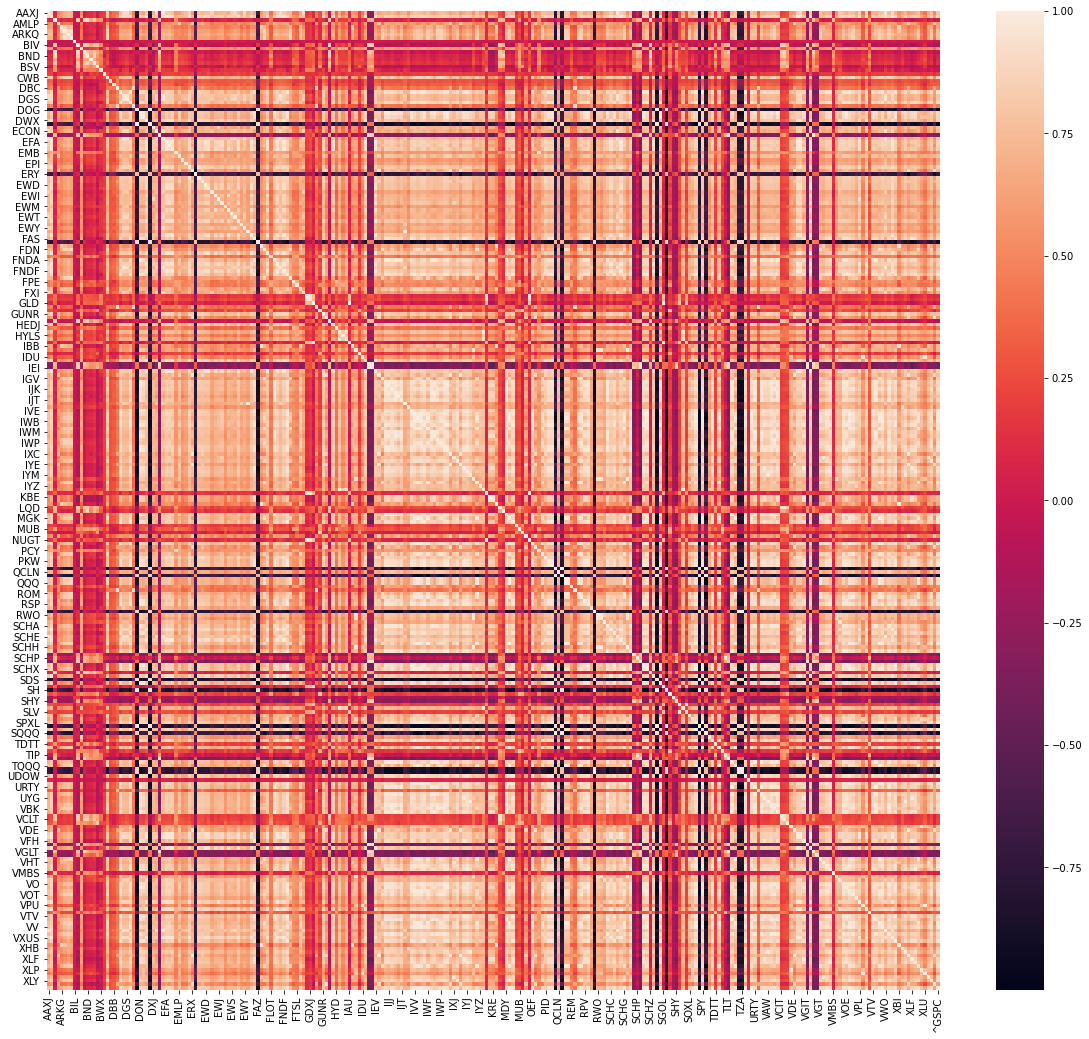

In [22]:
plt.figure(figsize=(20, 18))

sns.heatmap(returns_df.corr())

Reorder expected return to line up with covar matrix

In [23]:
exp_return_df = exp_return_df[covar_df.columns]
exp_return_df

ticker,AAXJ,ACWX,AGG,AMLP,ARKG,ARKK,ARKQ,ARKW,BIL,BIV,...,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XOP,^GSPC
exp_return,0.00051,0.000392,0.000123,-0.000063,0.001315,0.001501,0.00123,0.001696,0.000039,0.000132,...,0.000027,0.000581,0.000543,0.000941,0.000296,0.000335,0.00048,0.00066,-0.000199,0.000529


<AxesSubplot:xlabel='ticker'>

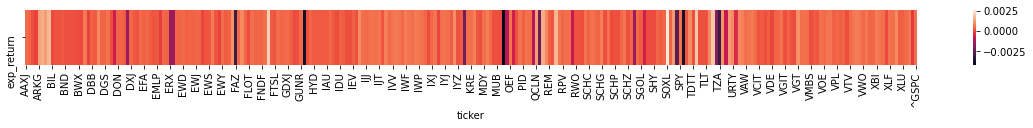

In [24]:
plt.figure(figsize=(20, 1))

sns.heatmap(exp_return_df)

Optimization of portfolio

$$ \frac{\mu - r_{f}}{\sigma} $$

In [25]:
alpha_df = exp_return_df.T - exp_return_df[benchmark] # subtract market return
alpha_df = alpha_df[alpha_df['exp_return'] > 0] # filter to only positive alpha
alpha_sr = alpha_df['exp_return'].to_numpy()

covar_df = covar_df[covar_df.index.isin(alpha_df.index)][alpha_df.index] # filter to only positive alpha
covar = covar_df.round(8).to_numpy()
alpha_df

,exp_return
ticker,
ARKG,0.000786
ARKK,0.000972
ARKQ,0.000701
ARKW,0.001167
CWB,0.000166
...,...
XLB,0.000010
XLF,0.000051
XLI,0.000014


In [37]:
from scipy.optimize import minimize
import numpy as np

def sharpe_ratio(weights: np.ndarray, covar_matrix: np.ndarray, alpha_returns: np.ndarray) -> float:
    # we are minimizing the negative to get a maximum
    objective = float(-weights.dot(alpha_returns) / np.sqrt(weights.dot(covar_matrix).dot(weights.T)))
    return objective

weights = np.ones_like(covar_df.columns)
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
# bounds are in the form of (lower, upper)
bounds = [(0, None,) for i in range(len(weights))] # bounded by zero (no shorting)
portfolio = minimize(sharpe_ratio, weights, args=(covar, alpha_sr), bounds=bounds, constraints=constraints)
portfolio

     fun: -0.061378131126796076
     jac: array([ 1.32859680e-02,  1.08660385e-02,  1.16729382e-02, -4.65661287e-10,
        1.87135567e-02,  3.34263430e-02,  2.40441994e-02,  1.54249598e-02,
        5.08105261e-02,  2.20785621e-02,  2.53409152e-02,  1.16140180e-01,
        1.96326892e-02,  3.06707793e-02,  3.04535734e-02,  2.79906541e-02,
        2.68504140e-02,  2.96053714e-02,  2.27142605e-02,  2.53315801e-02,
        2.41187103e-02,  2.53395559e-02,  2.29912535e-02,  2.95699183e-02,
        3.04038590e-02,  2.88418136e-02,  2.95744552e-02,  2.49735024e-02,
        2.65276148e-02,  2.58256691e-02,  1.81403384e-02,  2.69616987e-02,
        1.20174041e-01,  3.09753353e-02,  2.29666713e-02,  2.47921026e-02,
        3.15546319e-02,  2.71964259e-02,  1.16807749e-02,  2.64219493e-02,
        1.93827036e-02,  2.36015879e-02,  3.33198891e-02,  2.66311299e-02,
        3.20155551e-02,  3.15950015e-02,  1.83870504e-02,  2.31286068e-02,
        3.02986451e-02,  2.52274005e-02,  3.70945022e-02, 

In [52]:
# send weights to clipboard
pd.Series(portfolio.x).to_clipboard()

In [53]:
# send expected alphas to clipboard
alpha_df.to_clipboard()

In [54]:
# send covars to clipboard
covar_df.to_clipboard()

In [63]:
exp_yearly_alpha =  (1 + alpha_sr.dot(pd.Series(portfolio.x).to_numpy())) ** 250 - 1 # assume 250 trading days in year
exp_yearly_alpha

0.3386133642483302

In [64]:
from math import sqrt
exp_yearly_risk = sqrt(pd.Series(portfolio.x).to_numpy().dot(covar_df.to_numpy()).dot(pd.Series(portfolio.x).to_numpy().T)) * sqrt(250)
exp_yearly_risk

0.3006846074284561

In [65]:
exp_yearly_alpha / exp_yearly_risk

1.1261413317570597